### Тема:  Метод Эйлера. Схемы Рунге-Кутта решения ОДУ
**Выполнил**: Лежнин Максим Витальевич (ПМ-21)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1

###### Лабораторная работа № **7**, вариант № **23**

###### Весенний семестр, 2023 год

###### МИЭТ, Зеленоград

# Теоретическая справка

#### Численное решение дифференциальных уравнений
Будем рассматривать обыкновенные дифферецниальные уравнения:
$F(x,\, u(x),\, u'(x),\, ...,\, u^{(n)}(x)) = 0$

Как известно, в общем случае такие уравнения имеют бесконечно много решений. В приложениях требуется выделить одно из них. Поэтому уравнение часто рассматривают с дополнительными ограничивающими условиями. Вот основные типы дополнительных условий, с которыми мы буде работать:
1. Задача Коши для дифферецниальных уравнений первого рода:

$
\begin{cases}
u' = f(x, u),\, x \in [a,\, b], \\
u(x_a) = u_a
\end{cases}
$

2. Краевая задача для линейного дифференциального уравнения второго порядка:

$
\begin{cases}
u'' + g(x)u' + h(x)u = f(x),\, x \in [a,\, b], \\
\alpha_1u'(a) + \beta_1u(a) = u_a, \\
\alpha_2u'(b) + \beta_2u(b) = u_b
\end{cases}
$

При исследовании численных методов для каждой из перечисленных задач будем заранее предполагать, что решение соответствующей задачи существует, единственно и обладает необходимыми свойствами гладкости. Многие методы решения дифференциальных задач сводятся к следующему: на интересующем нас отрезке отрезке $[a,\, b]$, на котором требуется найти численное решение задачи для дифференциального уравнения, вводится набор точек или сетка $\omega = \{x_0,\, x_1,\, ...,\, x_n\}$. В дальнейшем мы всегда будем считать, что расстояние между соседними узлами сетки есть константа h, называемая шагом сетки. Кроме того полагаем $x_0 = a,\, x_n = b$ и ряд замены $u(x_k) = u_k$ для краткости. 

Теперь при помощи формул численного дифференцирования перейдем от дифференциального уравнения к разностному. Решение такого уравнения будет сеточная функция $y_k = y(x_k)$. Термин сеточная гвоорит о том, что область определения функции $y(x)$ есть не весь отрезок $[a,\, b]$, а только узлы сетки $\omega$. $u(x)$ и $y(x)$ - разные функции, но при определенных условиях можно считать $u_k \approx y_k,\, k = 0,\, 1,\, ...,\, n$.

#### Метод Эйлера
Заменим в задаче Коши производную правой разделенной разностью 

$\frac{y_{k + 1} - y_k}{h} = f(x_k, y_k),\ k = 0,\, 1,\, ...,\, n - 1,\ y_0 = u_a$

Решение этой системы уравнений находится явным образом по рекуррентной формуле:

$y_{k + 1} = y_k + hf(x_k, y_k),\ k = 0,\, 1,\, ...,\, n - 1,\ y_0 = u_a$

Геометрическая интерпретация метода состоит в замене точного решения ломаной. При этом угол наклона отрезка ломаной при $x \in [x_k,\, x_{k + 1}]$ совпадает с углом наклона касательной к графику точного решения $u(x)$ в точке $(x_k,\, u_k)$.

Погрешность аппроксимации:

$\psi_k = \frac{u_{k + 1} - u_k}{h} - f(x_k,\, y_k) = u'_k + O(h) - f(x_k,\, y_k)$

Откуда следует, что $\psi_n = O(h)$.

#### Метод Рунге-Кутта
Явный m-этапный метод Рунге-Кутта состоит в следующем. Пусть решение $y_k = y(x_k)$ уже известно. Задаются числовые коэффициенты: 
$
a_i,\, b_{ij},\ \ i = 2,\, 3,\, ...,\, m,\ j = 1,\, 2,\, ...,\, m - 1, \\
\sigma_i,\ \ \ i = 1,\, 2,\, ...,\, m
$

И последовательно вычисляются функции:
$
p_1 = f(x_k, y_k), \\
p_2 = f(x_k + a_2h, y_k + b_{21}hp_1), \\
p_3 = f(x_k + a_3h, y_k + b_{31}hp_1 + b_{32}hp_2), \\
... \\
p_m = f(x_k + a_mh, y_k + b_{m1}hp_1 + b_{m2}hp_2 + ... + b_{m, m - 1}hp_{m - 1}), \\
$

Затем из формулы $\frac{y_{k + 1} - y_k}{h} = \sum\limits_{i = 1}^m \sigma_ip_i$ находится новое значение $y_{k + 1} = y(x_{k + 1})$.

Коэффициенты $a_i,\, b_{ij},\, \sigma_i$ выбираются из соображений точности. Отметим, что методы Рунге-Кутта при $m > 5$ не используются. 

Для получения очередного значения $y_{k + 1}$ в методе Рунге-Кутта требуется выполнить много промежуточных вычислений. Но из-за высокого порядка погрешности аппроксимации  метода моно выбирать сетку с довольно крупным шагом h. В итоге общее число арифметических операций уменьшается. Наиболее распространенным является метод Рунге-Кутта четвертого порядка:

$
\begin{cases}
y_{k + 1} = y_k + \frac{h}{6}(p_1 + 2p_2 + 2p_3 + p_4), \\
p_1 = f(x_k,\, y_k), \\
p_2 = f(x_k + \frac{h}{2},\, y_k + \frac{h}{2}p_1), \\
p_3 = f(x_k \frac{h}{2},\, y_k + \frac{h}{2}p_2), \\
p_4 = f(x_k + h,\, y_k + hp_3)
\end{cases}
$

# Лабораторная работа:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Задание 1
Найдите численное решение следующего ОДУ методом Эйлера (на равномерной сетке) и сравните его с аналитическим:

$
\begin{cases}
\frac{dy}{dx} = x^2,\\
y(0) = 1
\end{cases}
$

In [2]:
# Euler's method
def Euler(y_derivative, condition, h = 0.001):
    (x_0, y_0) = condition
    n = int(1 / h)
    
    x = np.array([x_0 + i * h for i in range(n + 1)])
    y = np.array([y_0])
    y_derivative_values = np.array([y_derivative(i) for i in x])
    
    for i in range(1, n + 1):
        y = np.append(y, [y[i - 1] + h * y_derivative_values[i]])
        
    return (x, y)

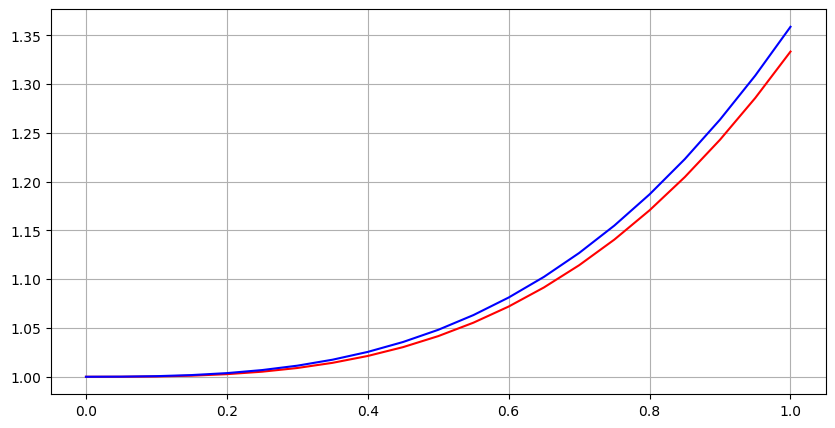

Max error: 0.025416666666666643


In [3]:
# derivative function
y_d = lambda x: x**2
# condition of y(x_0) = y_0 as (x_0, y_0)
condition = (0, 1)

# Euler's method for numerical solution
(x, y_numerical) = Euler(y_d ,condition, 0.05) 

# analytic solution
y_analytic = x**3 / 3 + 1

# plotting stuff
plt.figure(figsize=(10,5))
plt.plot(x, y_analytic, c='r')
plt.plot(x, y_numerical, c='b')
plt.grid(True)
plt.show()

# max error
max_error = max(np.abs(y_analytic - y_numerical))
print("Max error:", max_error)

### Задание 2-3
MATLAB (и numpy соотвественно) имеет множество функций для численного решения обыкновенных дифференциальных уравнений и их систем. Солверы ode23 и ode45 основаны на формулах Рунге-Кутты 2, 3 и 4, 5 порядков соответственно. Разберем пример их использования на примере задачи о колебаниях под воздействием внешней силы:

$
\begin{cases}
y'' + 2y' + 10y = \sin{t}, \\
y(0) = 1,\ y'(0) = 0
\end{cases}
$

Сводим к системе уравнений первого порядка:

$
\begin{cases}
y'_1 = y_2, \\
y'_2 = -2y_2 - 10y_1 + \sin{t},\\
y_1(0) = 1,\ y_2(0) = 0
\end{cases}
$

Постройте графики координаты $y_1(t)$ и скорости $y_2(t)$. Воспользовавшись знаниями теории обыкновенных дифференциальных уравнений можно получить аналитическое решение:

$y = e^{-t}(C_1 \cos{3t} + C_2 \sin{3t}) + \frac{1}{85}(9\sin{t} - 2\cos{t})$, где для данной задачи Коши $C_1 = \frac{87}{85},\, C_2 = \frac{26}{85}$. 

Постройте график аналитического решения и сравните с численным, полученным при помощи ode23 и ode45.

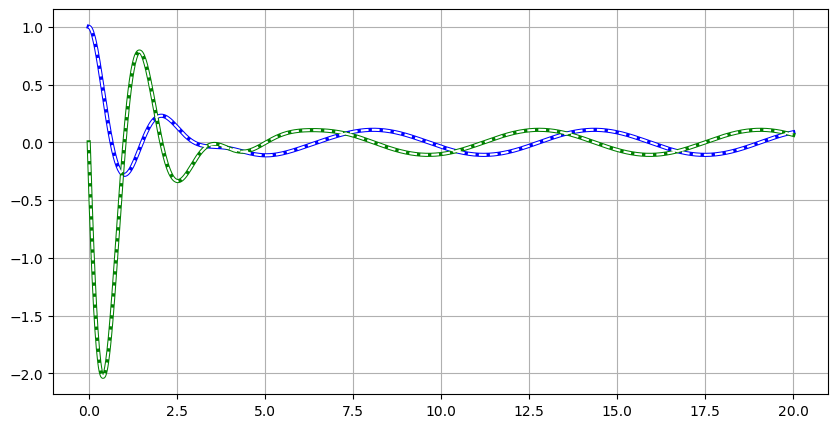

In [9]:
# system
def system(y, t):
    y_1, y_2 = y
    dydt = [y_2, -2 * y_2 - 10 * y_1 + np.sin(t)]
    return dydt

# y_1 = y, y_2 = y_1' = y'
y_1 = lambda t: np.exp(-t) * (87 / 85 * np.cos(3 * t) + 26 / 85 * np.sin(3 * t)) + 1 / 85 * (9 * np.sin(t) - 2 * np.cos(t))
y_2 = lambda t: 1 / 85 * np.exp(-t) * (2 * np.exp(t) * np.sin(t) - 287 * np.sin(3 * t) + 9 * np.exp(t) * np.cos(t) - 9 * np.cos(3 * t))

t = np.linspace(0, 20, 1000)

# initial conditions
y_0 = [1, 0]

# numeric solution
solution = odeint(system, y_0, t)

# plotting stuff
plt.figure(figsize=(10,5))
plt.grid(True)

# plotting analytic solution
plt.plot(t, y_1(t), c="b", linewidth=3)
plt.plot(t, y_2(t), c="g", linewidth=3)

# plotting numeric solution
plt.plot(t, solution[:, 0], c="w", linestyle="--")
plt.plot(t, solution[:, 1], c="w", linestyle="--")

plt.show()

### Задание 4
Решите следующее дифференциальное уравнение:

$
\begin{cases}
y'' = -\frac{1}{t^2}, \\
y(t_0) = \ln{t_0},\text{ при } t_0 = 0.01
\end{cases}
$

и сверьте решение с аналитическим $y = \ln{t}$

Аналогично предыдущему заданию перепишем систему:

$
\begin{cases}
y'_1 = y_2, \\
y'_2 = -\frac{1}{t^2},\\
y_1(0.01) = \ln{0.01},\, y_2(0.01) = 1 / 0.01 = 100
\end{cases}
$

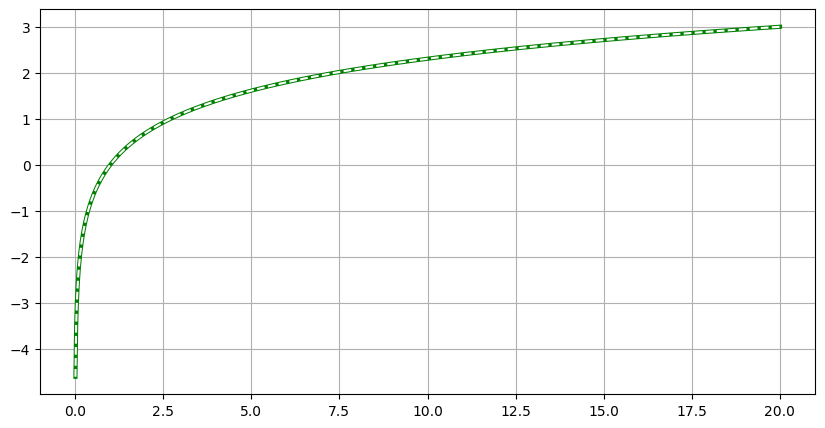

In [10]:
# system
def system(y, t):
    y_1, y_2 = y
    dydt = [y_2, -1 / t**2]
    return dydt

t = np.linspace(0.01, 20, 1000)

# initial conditions
y_0 = [np.log(0.01), 100]

# numeric solution
solution = odeint(system, y_0, t)

# plotting stuff
plt.figure(figsize=(10,5))
plt.grid(True)

# plotting analytic solution
plt.plot(t, np.log(t), c="g", linewidth=3)

# plotting numeric solution
plt.plot(t, solution[:, 0], c="w", linestyle="--")

plt.show()

### Дополнительное задание
Дифференциальные уравнения являются сильным инструментом для описания многих явлений в разных науках. Решим физическую задачу используя численные методы решения дифференциальных уравнений.

Катер массой m движется по озеру со скоростью $v_0$. В момент времени $t = 0$ выключили его двигатель. Величина силы сопротивления, действующей на катер, пропорциональная квадрату скорости катера $F = -bv^2$, где b - константа. Найдите зависимость величины скорости катера от времени.

Для решения задачи вспомним второй закон Ньютона, а так же то, что ускорение - первая производная от скорости по времени. То есть:

$\vec{F} = m\vec{a} \implies -bv^2 = m \frac{dv}{dt} \implies \frac{dv}{dt} = -\frac{b}{m}v^2$

Аналитическое решение выглядит следующим образом:

$v(t) = 1/(\frac{b}{m}t + \frac{1}{v(0)})$

Для большей определенности давайте зададим значения константам $m = 0.5$ и $b = 2$, а также введем начальное условие $v(0) = 8$ м/с. Тогда аналитическое решение будет выглядить так:

$v(t) = 1/(4t + \frac{1}{8})$

Теперь мы решим численно дифференциальное уравнение и сравним полученный результат с аналитическим решением. Воспользуюсь методом Эйлера.

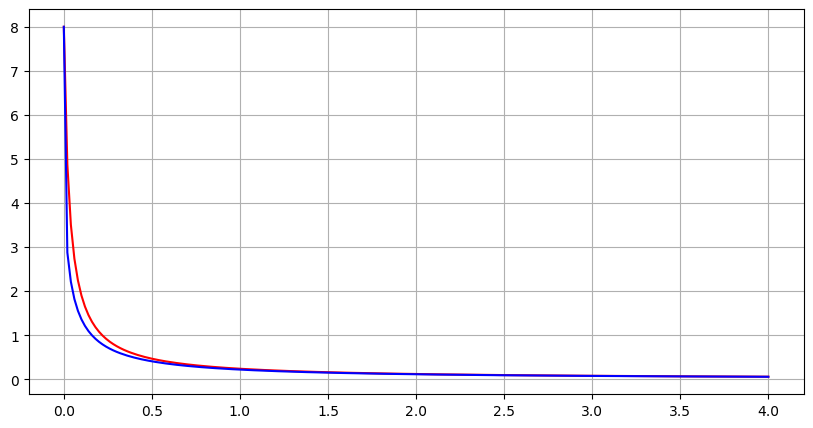

Max error: 1.9980487804878049


In [13]:
# initial conditions and constants
(t_0, v_0) = (0, 8)
b = 2
m = 0.5

# step and distance
h = 0.02
distance = 4
n = int(distance / h)

# derivative function
dvdt = lambda t, v: -b / m * v**2 

t = np.array([t_0 + i * h for i in range(n + 1)])

# analytic solution
v_analytic = 1 / (b / m * t + 1 / v_0)

# Euler's method for numerical solution
v = np.zeros(len(t))
v[0] = v_0
for i in range(len(t) - 1):
    v[i + 1] = v[i] + dvdt(t[i], v[i]) * (t[i + 1] - t[i])

# plottinf stuff
plt.figure(figsize=(10,5))
plt.plot(t, v_analytic, c='r')
plt.plot(t, v, c='b')
plt.grid(True)
plt.show()

# max error
max_error = max(np.abs(v_analytic - v))
print("Max error:", max_error)